In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [32]:
data = loadmat('/home/teemo/ML/data/ex8data1.mat')
X = data['X']
X.shape

(307, 2)

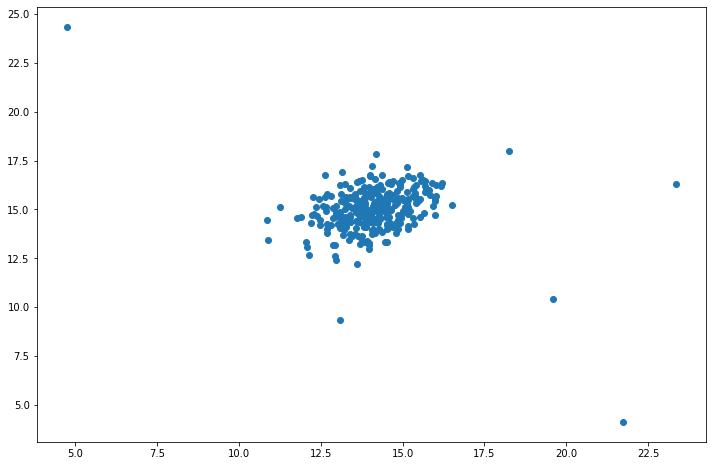

In [33]:
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0],X[:,1])
plt.show()

In [34]:
def estimate_gaussian(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    
    return mu,sigma

In [35]:
mu,sigma = estimate_gaussian(X)
mu,sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

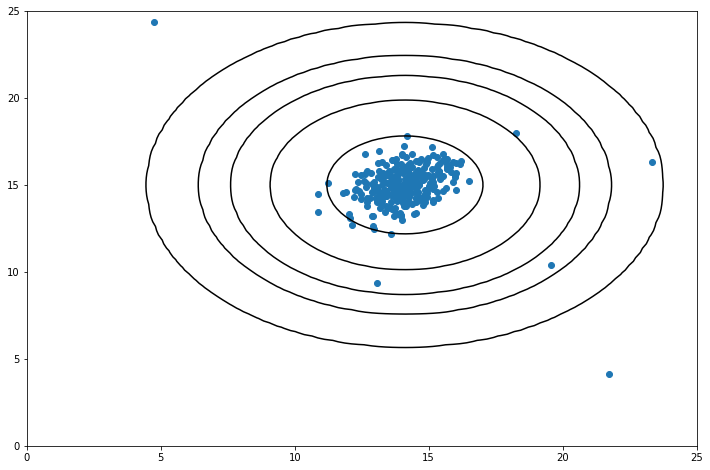

In [36]:
xplot = np.linspace(0,25,100)
yplot = np.linspace(0,25,100)
Xplot,Yplot = np.meshgrid(xplot,yplot)
Z = np.exp((-0.5)*((Xplot-mu[0])**2/sigma[0]+(Yplot-mu[1])**2/sigma[1]))

fig,ax = plt.subplots(figsize=(12,8))
contour = plt.contour(Xplot,Yplot,Z,[10**-11,10**-7,10**-5,10**-3,0.1],colors='k')
ax.scatter(X[:,0],X[:,1])
plt.show()


In [37]:
Xval = data['Xval']
yval = data['yval']

Xval.shape,yval.shape

((307, 2), (307, 1))

In [38]:
#计算数据点属于正态分布的概率的方法
from scipy import stats
dist = stats.norm(mu[0],sigma[0])
dist.pdf(15)

0.1935875044615038

In [39]:
dist.pdf(X[:,0])[0:10]

array([0.183842  , 0.20221694, 0.21746136, 0.19778763, 0.20858956,
       0.21652359, 0.16991291, 0.15123542, 0.1163989 , 0.1594734 ])

In [47]:
p = np.zeros((Xval.shape[0],Xval.shape[1]))
p[:,0] = stats.norm(mu[0],sigma[0]).pdf(Xval[:,0])
p[:,1] = stats.norm(mu[1],sigma[1]).pdf(Xval[:,1])

p[302]


array([1.04047033e-13, 3.25866779e-08])

In [41]:
def select_threshold(pval,yval):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    
    step = (pval.max() - pval.min()) /1000
    
    for epsilon in np.arange(pval.min(),pval.max(),step):
        preds = pval < epsilon
        
        tp = np.sum(np.logical_and(preds == 1,yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1,yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0,yval == 1)).astype(float)
        
        precision = tp / (tp+fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)
        
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
            
    return best_epsilon,best_f1
        

In [42]:
epsilon,f1 = select_threshold(p,yval)
epsilon,f1

/home/teemo/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(0.009566706005956842, 0.7142857142857143)

In [43]:
outliers = np.where(p < epsilon)
outliers

(array([300, 300, 301, 302, 302, 303, 303, 304, 305, 306]),
 array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0]))

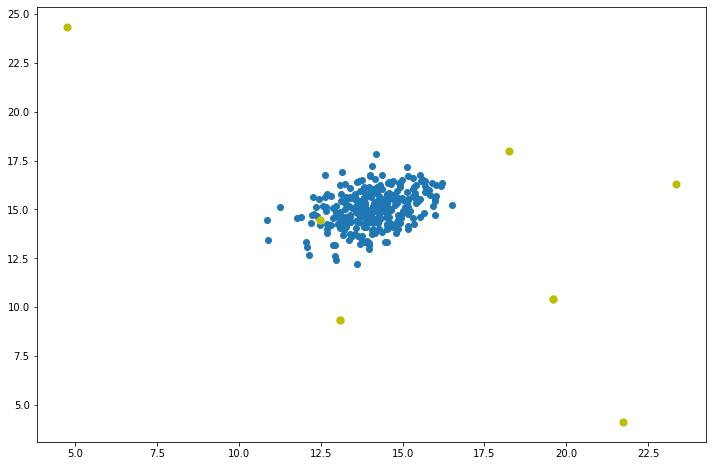

In [45]:
fig , ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0],X[:,1])

ax.scatter(X[outliers[0],0],X[outliers[0],1],s=50,color='r',marker='o')
plt.show()